<center><font size = 5><b> Module 08: Data Visualization </b></font></center>

## Distribution Plots

https://www.python-graph-gallery.com/ridgeline/

### Density Plots

### Histograms

### Box Plots

### Ridgeline Plots

## Correlation Plots

https://www.python-graph-gallery.com/
    
### Scatter/Bubble Plots    

### line plots

### 2D density

### Heatmaps


A bubble plot is a scatterplot where the circle size is mapped to the value of a third numeric variable. This section shows many bubble plots made with Python, using both the Matplotlib and Seaborn libraries.

## Categorical Plots

### Bar/Pie plots

### Tree maps

### Donut Plot

### Dendrograms


## Various Maps

### Base Maps

## Choropleth

### Connection on Maps

### Bubble on Maps

## Animations

This section is based on the famous gapminder dataset. It provides the average life expectancy, gdp per capita and population size for more than 100 countries. It is available online here and I've stored a copy on the gallery github repo

We first load it in python and have a look to the 3 first rows.

In [1]:
# Libraries
import pandas as pd

# read the data (on the web)
gapminder = pd.read_csv('https://github.com/pengdsci/PythonCrashCourse/raw/main/datasets/gapminderData.csv')

# Check the first 3 rows
gapminder.head(3)

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710


### Bubble chart

Let's build a bubble chart for the first year of the dataset (1952) using the scatter() function of `matplotlib`.

(30, 75)

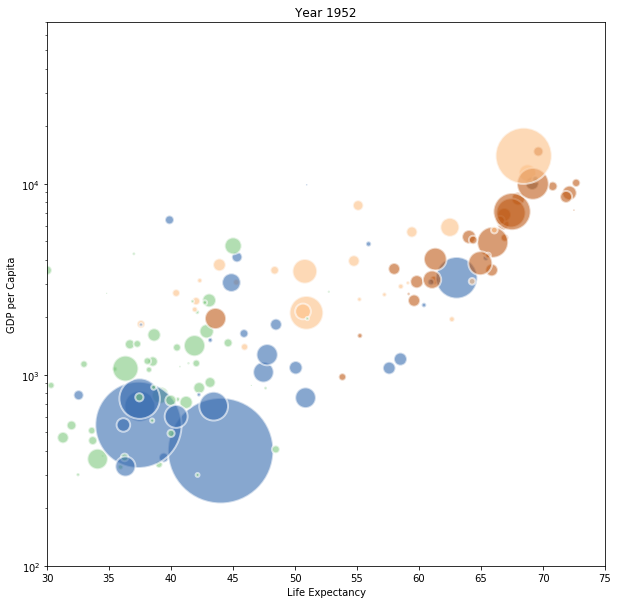

In [10]:
# import matplotlib
import matplotlib.pyplot as plt

# And I need to transform my categorical column (continent) in a numerical value group1->1, group2->2...
gapminder['continent']=pd.Categorical(gapminder['continent'])

# Set the figure size
plt.figure(figsize=(10, 10))

# Subset of the data for year 1952
gapminder1952 = gapminder[ gapminder.year == 1952 ]

# Scatterplot
plt.scatter(
    x = gapminder1952['lifeExp'], 
    y = gapminder1952['gdpPercap'], 
    s = gapminder1952['pop']/50000, 
    c = gapminder1952['continent'].cat.codes, 
    cmap="Accent", 
    alpha=0.6, 
    edgecolors="white", 
    linewidth=2);
 
# Add titles (main and on axis)
plt.yscale('log')
plt.xlabel("Life Expectancy")
plt.ylabel("GDP per Capita")
plt.title("Year 1952")
plt.ylim(100,70000)
plt.xlim(30, 75)

### Animation

An animation is basically a set of static images visualized one after the other. The strategy here is to build on png file for each year of the dataset, and then concatenated them as a gif.

Let's build a loop that will output one png file per year of the dataset:

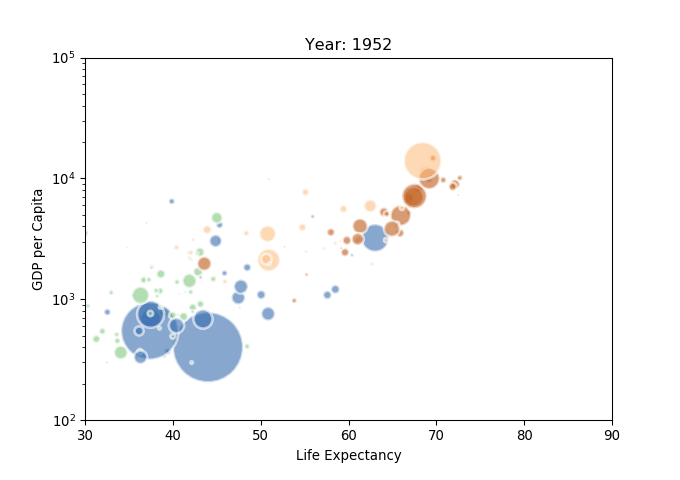

In [27]:
## importing libraries 
import os
import imageio
import IPython
from IPython.display import Image

# image resolution
dpi=96

# For each year: data set is a longitudinal data, loop index, year, must be unique
for i in gapminder.year.unique():
    # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)
    
    # Find the subset of the dataset for the current year
    subsetData = gapminder[ gapminder.year == i ]

    # Build the scatterplot-bubble chart
    plt.scatter(
        x=subsetData['lifeExp'], 
        y=subsetData['gdpPercap'], 
        s=subsetData['pop']/200000 , 
        c=subsetData['continent'].cat.codes, 
        cmap="Accent", 
        alpha=0.6, 
        edgecolors="white", 
        linewidth=2)
    
    # Add titles (main and on axis)
    plt.yscale('log')
    plt.xlabel("Life Expectancy")
    plt.ylabel("GDP per Capita")
    plt.title("Year: " + str(i) )
    plt.ylim(100,100000)
    plt.xlim(30, 90)
    
    # Save it & close the figure
    filename='./image/animation/Gapminder_step'+str(i)+'.png'
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
    plt.close(fig)
    
## making gif    
png_dir = "./image/animation/"
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith('.png'):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
kargs = { 'duration': 1 }
imageio.mimsave('./image/animation/movie.gif', images, 'GIF', **kargs)

#display gif: local drive
#Image(open('./image/animation/gapminder-movie.gif','rb').read())
# URL
Image(url='https://github.com/pengdsci/PythonCrashCourse/raw/main/image/gapminder-movie.gif')